In [1]:
#Import of packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 15) 
pd.set_option('display.max_rows', 50) 
df=pd.read_csv("C:/Users/zacha/Documents/GitHub/Data_Science_Portfolio/datasets/worldhappiness2019.csv")

#read in region csv
regiondata=pd.read_csv("C:/Users/zacha/Documents/GitHub/Data_Science_Portfolio/datasets//region.csv")
regiondata

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
...,...,...,...
250,Western Sahara,Africa,Northern Africa
251,Yemen,Asia,Western Asia
252,Zambia,Africa,Sub-Saharan Africa
253,Zimbabwe,Africa,Sub-Saharan Africa


In [2]:
#sql join of region csv on country name in worldhappiness2019
mergedata=pd.merge(df, regiondata, how='left', left_on='Country or region', right_on='name')
# Checking for missing values 
mergedata.loc[pd.isnull(mergedata).iloc[:,9]].to_csv("missing.csv",index=False)


In [3]:
# clean up final csv data
df=mergedata.drop(['name'],axis=1)
df=df.drop(['Country or region'],axis=1)
df=df.drop(['sub-region'],axis=1)

df

,Happiness_level,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,Very High,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,Very High,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,Very High,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,Very High,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,Very High,1.396,1.522,0.999,0.557,0.322,0.298,Europe
...,...,...,...,...,...,...,...,...
151,Very Low,0.359,0.711,0.614,0.555,0.217,0.411,Africa
152,Very Low,0.476,0.885,0.499,0.417,0.276,0.147,Africa
153,Very Low,0.350,0.517,0.361,0.000,0.158,0.025,Asia
154,Very Low,0.026,0.000,0.105,0.225,0.235,0.035,Africa


In [7]:
#For the purpose of visualization, I'm going to turn the target happiness level variable into a ordinal categorical variable
#Looking at the categorical values for hapiness_level
pd.crosstab(index=df['Happiness_level'],columns='count')

col_0,count
Happiness_level,
Average,31
High,32
Low,31
Very High,31
Very Low,31


In [14]:
#For the purpose of visualization, I'm going to turn the target happiness_level variable into a ordinal categorical variable
#This code turns the feature into a Likert Scale dummy variable
df
conditions = [
  (df['Happiness_level'] == 'Very High'),
  (df['Happiness_level'] == 'High'),
  (df['Happiness_level'] == 'Average'),
  (df['Happiness_level'] == 'Low'),
  (df['Happiness_level'] == 'Very Low')]
choices = [5,4,3,2,1]
df['Happiness_level'] = np.select(conditions, choices, default=np.nan)

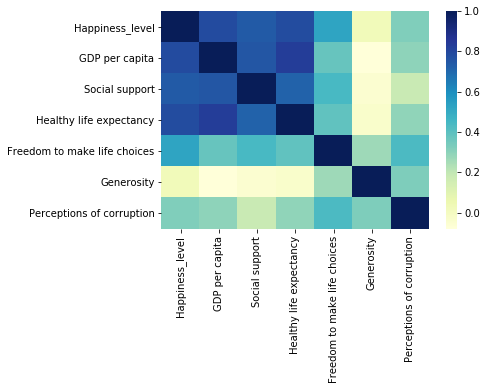

In [15]:
#creates a correlational heatmap based on the bivariate relationship of features
sns.heatmap(df.corr(),robust=True,cmap="YlGnBu")

Looking at the correlational heatmap, it would seem that a few features are highly correlated with each other as well as the target feature of happiness_level. It would seem that GDP per capita, Social Support, and Health Life Expectancy all vary together as well as with happines level*

C:\Users\zacha\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


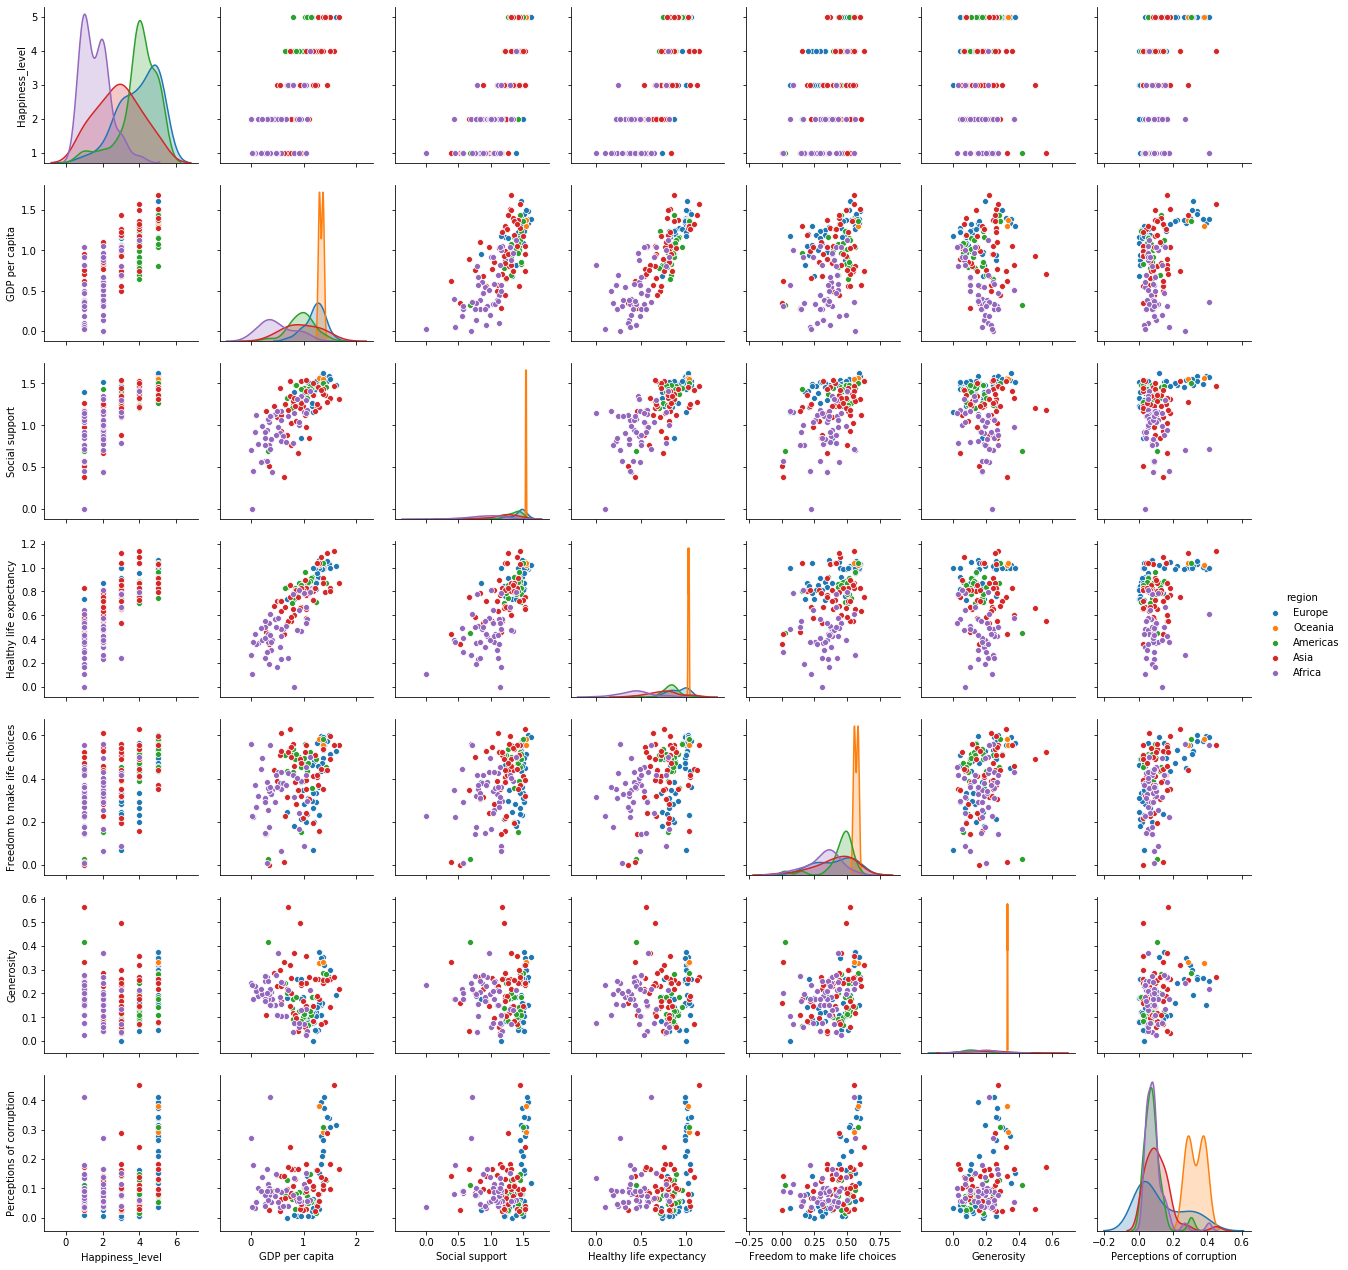

In [16]:
#Creates a series of bivariate distruptions diveded by region
sns.pairplot(df, hue='region')

Looking at the target variable of happiness, regional differences are quite large. With America and Europe being the most happy, Asia varying widely, and with Africa being considered mostly unhappy. Looking at the relationship with all of the features and happiness_level, georosity doesn't have a strong trend, with almost all countries following between the range of .3 to .1. So, genorosity does not seem to have an effect on happiness. THe strongest predictive variables seem to be GDP per capita, as it has a strong positive trend with happiness level. Also, it seems like falling between 1.0 to 1.5 gdp per capita is key to a high happiness level.

In [17]:
#Reloading dataset because colab was being weird
#It's just a copy and paste of above code
df=pd.read_csv("worldhappiness2019.csv")
regiondata=pd.read_csv("region.csv")
mergedata=pd.merge(df, regiondata, how='left', left_on='Country or region', right_on='name')
df=mergedata.drop(['name'],axis=1)
df=df.drop(['Country or region'],axis=1)
df=df.drop(['sub-region'],axis=1)
df

,Happiness_level,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,Very High,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,Very High,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,Very High,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,Very High,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,Very High,1.396,1.522,0.999,0.557,0.322,0.298,Europe
...,...,...,...,...,...,...,...,...
151,Very Low,0.359,0.711,0.614,0.555,0.217,0.411,Africa
152,Very Low,0.476,0.885,0.499,0.417,0.276,0.147,Africa
153,Very Low,0.350,0.517,0.361,0.000,0.158,0.025,Asia
154,Very Low,0.026,0.000,0.105,0.225,0.235,0.035,Africa


In [18]:
#crosstab of all regions
pd.crosstab(index=df['region'],columns='count')

col_0,count
region,
Africa,45
Americas,23
Asia,46
Europe,40
Oceania,2


In [19]:
#creating dummies and concating them back to dataframe
df = pd.concat([df.drop('region', axis=1), pd.get_dummies(df['region'])], axis=1)
df.columns


Index(['Happiness_level', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Africa', 'Americas', 'Asia', 'Europe',
       'Oceania'],
      dtype='object')

In [20]:
# Set up training and test data
from sklearn.model_selection import train_test_split

y=df['Happiness_level']
X=df.drop(['Happiness_level'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [21]:
#Running a random forest classifier to hone in on important features
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200)
formodel = forest.fit(X_train, y_train)


print()

print(formodel.feature_importances_)




[0.19586574 0.16673075 0.19796169 0.13639766 0.09297758 0.13169829
 0.02291352 0.01981084 0.02215848 0.01308664 0.0003988 ]


In [16]:
X.columns

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Africa', 'Americas', 'Asia', 'Europe',
       'Oceania'],
      dtype='object')

According to the automatic feature selection of my random forest classifier, GDP, Social Support, Health Life, Freedom, and perceptions of corruption had stronger predictive effects and are important in the determination of a country as happy. These results are similar to the ones from the correaltional visualizations

In [22]:
#Reading in data one last time because google colab was being weird with my dataframes
df=pd.read_csv("worldhappiness2019.csv")
regiondata=pd.read_csv("region.csv")
mergedata=pd.merge(df, regiondata, how='left', left_on='Country or region', right_on='name')
df=mergedata.drop(['name'],axis=1)
df=df.drop(['Country or region'],axis=1)
df=df.drop(['sub-region'],axis=1)

In [4]:
# Set up training and test data
from sklearn.model_selection import train_test_split

y=df['Happiness_level']
X=df.drop(['Happiness_level'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#Running  preprocessing pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features=X.columns.tolist()
numeric_features.remove('region')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


#Fit your preprocessor object
prediction_input_preprocessor=preprocessor.fit(X_train) 



In [15]:
#Running funtion on metric evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata


In [26]:
#Running a random forest classifier with 1000 trees
from numpy import loadtxt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


#running a random forst classifier
model=RandomForestClassifier(n_estimators=1000, random_state = 0)
model.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=model.predict(prediction_input_preprocessor.transform(X_test))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Random Forest Classifier's accuracy:", np.mean(cross_val_score(model, prediction_input_preprocessor.transform(X_train), y_train, cv=10)))
print("Random Forest Classifier's accuracy on test data: {:.5f}".format(model.score(prediction_input_preprocessor.transform(X_test), y_test)))


Random Forest Classifier's accuracy: 0.6068181818181818
Random Forest Classifier's accuracy on test data: 0.38462


In [27]:
#Using grid search cv to tune paramters
from sklearn.model_selection import GridSearchCV
rf_param_grid = {'max_depth': range(3,4),'n_estimators': range(99,100),'min_samples_leaf': range(7,8)}
rf_grid = GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=10)
rf_grid.fit(prediction_input_preprocessor.transform(X_train),y_train)
print("Test set score: {:.2f}".format(rf_grid.score(prediction_input_preprocessor.transform(X_test),y_test)))
print("Best Parameter: {}".format(rf_grid.best_params_))

Test set score: 0.41
Best Parameter: {'max_depth': 3, 'min_samples_leaf': 7, 'n_estimators': 99}


In [28]:
#Running hyper tuned model and evaluating it
model=RandomForestClassifier(n_estimators=8, random_state = 0,max_depth = 3,min_samples_leaf = 1)
model.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=model.predict(prediction_input_preprocessor.transform(X_test))

In [29]:
#evaluating model
modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.410256,0.417914,0.486616,0.425,0,0,0,0


In [30]:
#building a penalized logistic regression model with l2 for ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
pen_logreg = LogisticRegression(penalty = 'l2').fit(prediction_input_preprocessor.transform(X_train), y_train)
print("Training set score: {:.2f}".format(pen_logreg.score(prediction_input_preprocessor.transform(X_train), y_train)))
print("Test set score: {:.2f}".format(pen_logreg.score(prediction_input_preprocessor.transform(X_test), y_test))) 
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(pen_logreg,prediction_input_preprocessor.transform(X_train), y_train, cv=kfold))))

Training set score: 0.72
Test set score: 0.46
Mean Cross Validation, KFold: 0.56


In [ ]:
#trying to stop warnings from popping up, it failed
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(penalty = 'l2'), param_grid, cv=5)
grid.fit(prediction_input_preprocessor.transform(X_train), y_train)

print("LOGISTIC REGRESSION with BIGRAMS")
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)


In [0]:
#adjusting the C parameter
model=pen_logreg = LogisticRegression(penalty = 'l2',C = .1).fit(prediction_input_preprocessor.transform(X_train), y_train)
model.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=model.predict(prediction_input_preprocessor.transform(X_test))

In [41]:
#evaluating model
modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.435897,0.430737,0.508442,0.463889,0,0,0,0


**Answer** the C paramter adjusts the regularization of the function, which controls how much coeffecients that aren't as predictive contribute to the classification 

In [31]:
#building a keras neural net
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='relu'))

model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
model.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train), 
               batch_size = 60, 

               epochs = 50, verbose = 0, validation_split=0.2)  

Using TensorFlow backend.


In [37]:
model_eval_metrics( y_test,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.410256,0.356777,0.332381,0.441667,0,0,0,0


In [0]:
#Creating a model to perform cross validation
def create_model():
	# create model
  model = Sequential()
  model.add(Dense(11, input_dim=11, activation='relu'))
  model.add(Dense(11, activation='relu'))
  model.add(Dense(11, activation='relu'))
  model.add(Dense(5, activation='softmax'))                                          
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)

In [48]:
#tuning the number of epochs
param_grid = dict(epochs=[500,600,700])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.625725 using {'epochs': 600}


In [49]:
#tuning the number of epochs again
param_grid = dict(epochs=[700,800,900])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.573551 using {'epochs': 800}


In [50]:
#creating another model to perform cross validation
def create_model(learn_rate=0.01):
	# create model
  model = Sequential()
  model.add(Dense(11, input_dim=11, activation='relu'))
  model.add(Dense(11, activation='relu'))
  model.add(Dense(5, activation='softmax'))                                          
  # Compile model
  optimizer = SGD(lr=learn_rate)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

#call model function in KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=600, verbose=0)

learn_rate = [0.0001,0.001, 0.01,.1,1]
param_grid = dict(learn_rate=learn_rate)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.555435 using {'learn_rate': 0.01}


In [38]:
#Running final keras model with tweaked paramaters
from keras import optimizers
model = Sequential()
model.add(Dense(13, input_dim=11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='softmax')) 
                              
# Compile model
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Fitting the NN to the Training set
model.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train), 
               batch_size = 25, 

               epochs = 700, verbose = 0, validation_split=0.2)  

In [39]:
# using predict_classes() for multi-class data to return predicted class index.


prediction_index=model.predict_classes(prediction_input_preprocessor.transform(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Function to use to return label from column index location
def index_to_label(labels,index_n): 
    return labels[index_n]
    
# Example: return label at predicted index location 1
index_to_label(labels,1)

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))


In [40]:
modelevalobject=model_eval_metrics( y_test,predicted_labels,classification="TRUE")

modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.435897,0.431191,0.490152,0.455556,0,0,0,0


In [2]:
#load even more data and join it with original datasets
df=pd.read_csv("C:/Users/zacha/Documents/GitHub/Data_Science_Portfolio/datasets/worldhappiness2019.csv")
regiondata=pd.read_csv("C:/Users/zacha/Documents/GitHub/Data_Science_Portfolio/datasets//region.csv")
countrydata=pd.read_csv("C:/Users/zacha/Documents/GitHub/Data_Science_Portfolio/datasets/newcountryvars.csv")
mergedata=pd.merge(df, regiondata, how='left', left_on='Country or region', right_on='name')
mergedata.loc[pd.isnull(mergedata).iloc[:,9]].to_csv("missing.csv",index=False)
mergedata=pd.merge(df, countrydata, how='left', left_on='Country or region', right_on='country_name')
mergedata.loc[pd.isnull(mergedata).iloc[:,9]].to_csv("missing.csv",index=False)

mergedata.head()

,Happiness_level,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,kiva_country_name
0,Very High,Finland,1.340,1.587,0.986,0.596,0.153,...,NaN,0.894517,81.006,17.04792,11.194000,38868.13552,Finland
1,Very High,Denmark,1.383,1.573,0.996,0.592,0.252,...,13.4,0.924649,80.412,19.18880,12.700170,44518.92402,Denmark
2,Very High,Norway,1.488,1.582,1.028,0.603,0.271,...,NaN,0.949423,81.711,17.67187,12.746420,67614.35348,Norway
3,Very High,Iceland,1.380,1.624,1.026,0.591,0.354,...,NaN,0.921110,82.724,18.99422,12.190892,37065.21451,Iceland
4,Very High,Netherlands,1.396,1.522,0.999,0.557,0.322,...,8.8,0.924312,81.706,18.11654,11.914070,46325.57658,Netherlands


In [3]:
# clean up final region data
X=mergedata.drop(['Happiness_level'],axis=1)
X=X.drop(['Country or region','country_name','country_code','country_code3','region','kiva_country_name'],axis=1)
X

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,continent,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,1.340,1.587,0.986,0.596,0.153,0.393,Europe,5523231.0,NaN,0.894517,81.006,17.04792,11.194000,38868.135520
1,1.383,1.573,0.996,0.592,0.252,0.410,Europe,5733551.0,13.4,0.924649,80.412,19.18880,12.700170,44518.924020
2,1.488,1.582,1.028,0.603,0.271,0.341,Europe,5305383.0,NaN,0.949423,81.711,17.67187,12.746420,67614.353480
3,1.380,1.624,1.026,0.591,0.354,0.118,Europe,335025.0,NaN,0.921110,82.724,18.99422,12.190892,37065.214510
4,1.396,1.522,0.999,0.557,0.322,0.298,Europe,17035938.0,8.8,0.924312,81.706,18.11654,11.914070,46325.576580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411,Africa,12208407.0,39.1,0.497577,64.749,10.76172,3.801335,1616.857330
152,0.476,0.885,0.499,0.417,0.276,0.147,Africa,57310019.0,22.8,0.530577,65.512,8.92369,5.780000,2466.902694
153,0.350,0.517,0.361,0.000,0.158,0.025,Asia,35530081.0,35.8,0.479375,60.704,10.05375,3.550000,1870.827131
154,0.026,0.000,0.105,0.225,0.235,0.035,Africa,4659080.0,NaN,0.352440,51.458,7.09898,4.230000,587.473961


In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# preprocessing pipelines for both numeric and categorical data.

numeric_features=X.columns.tolist()
numeric_features.remove('continent')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['continent']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

prediction_input_preprocessor=preprocessor.fit(X_train)


In [20]:
# Set up training and test data
from sklearn.model_selection import train_test_split

y = mergedata['Happiness_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dense, Activation, Dropout,BatchNormalization
opt = SGD(lr = .01, decay=1e-6, momentum=0.5, nesterov=True)

model = Sequential()
model.add(Dense(60, input_dim=18, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.3))
model.add(Dense(60, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.3))
model.add(Dense(60, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.3))
model.add(Dense(60, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.3))
model.add(Dense(5, activation='softmax'))
                                            

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization

# Fitting the NN to the Training set
model.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train),
          validation_data=(prediction_input_preprocessor.transform(X_test),pd.get_dummies(y_test)),
          epochs = 2000, verbose=0, batch_size=25, callbacks=[es,mc])


C:\Users\zacha\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 00742: early stopping


In [13]:
prediction_index=model.predict_classes(prediction_input_preprocessor.transform(X_test))
labels=pd.get_dummies(y_train).columns
predicted_labels=list(map(lambda x: labels[x], prediction_index))

In [16]:
modelevalobject=model_eval_metrics( y_test,predicted_labels,classification="TRUE")

modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.512821,0.513767,0.561472,0.513889,0,0,0,0


### This is a very small dataset, so 51% when predicted 5 different classes is pretty good.